In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt24 = "Analyze the rdf of the simulation of 1A3N solvated in water"
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-25
time: 16:14:33
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: To analyze the radial distribution function (RDF) of the simulation of 1A3N solvated in water, I need to ensure that I have the necessary trajectory and topology files for the simulation. I will use the RDFTool to calculate the RDF.

Action: 
```
{
  "action": "RDFTool",
  "action_input": {
    "input": {
      "trajectory_fileid": "1A3N_trajectory",
      "topology_fileid": "1A3N_topology"
    }
  }
}
```File ID not in Path Registry in RDF tool:  Trajectory File ID not in path registry
To proceed with the RDF analysis of the simulation of 1A3N solvated in water, I need to first ensure that the necessary files are available in the path registry. I will list the available paths to check if the required files are present.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To proceed with the RDF analysis of the simulation of 1A3N solvated in water, I need to first download the necessary PDB file for 1A3N. Once I have the PDB file, I

2024-07-25 16:14:41.147 
  command:

    streamlit run /scratch/qcampbe2/myenvs/mdagent/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the RDF analysis of the simulation of 1A3N solvated in water, I need to set up and run a short simulation to generate the required trajectory and topology files. I will use the `SetUpandRunFunction` tool for this purpose.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_161441",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "CutoffPeriodic",
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 5000,
      "record_interval_steps": 50,
      "record_params": ["step", "potenti

('The RDF analysis of the simulation of 1A3N solvated in water has been successfully completed. The radial distribution function (RDF) plot has been generated.\n\nFinal Answer: The RDF analysis for the simulation of 1A3N solvated in water has been successfully completed. The RDF plot is available and can be used for further analysis. The plot file ID is fig0_161952.',
 'SOJZMCLV')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-25
time: 16:19:55
Files found in registry: 1A3N_161441: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_161441
 1A3N_161517: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_161523: Initial positions for simulation sim0_161523
 sim0_161523: Basic Simulation of Protein 1A3N_161517
 rec0_161529: Simulation trajectory for protein 1A3N_161517 and simulation sim0_161523
 rec1_161529: Simulation state log for protein 1A3N_161517 and simulation sim0_161523
 rec2_161529: Simulation pdb frames for protein 1A3N_161517 and simulation sim0_161523
 fig0_161952: RDF plot for the trajectory file with id: rec0_161529


In [6]:
path_traj = registry.get_mapped_path("rec0_161529")
path_top = registry.get_mapped_path("top_sim0_161523")
assert os.path.exists(path_traj)
assert os.path.exists(path_top)
assert path_traj != path_top

assert path_traj.endswith(".dcd")
assert path_top.endswith(".pdb")

In [7]:
import mdtraj as md
traj = md.load(path_traj, top=path_top)
print(f"Simulation with :{traj.n_atoms} for {traj.n_frames} frames. Total time: {traj.time[-1]*0.002} ps")

Simulation with :24374 for 120 frames. Total time: 0.23800000000000002 ps


In [9]:
rdf_path = registry.get_mapped_path("fig0_161952")
assert os.path.exists(rdf_path), "Path either is incorrect or doesn't exist"
#Disclaimer: Theres a bug in the rdf path saving. The image was created correctly, but the path was not saved correctly.
from IPython.display import Image
Image(filename=rdf_path)

AssertionError: Path either is incorrect or doesn't exist

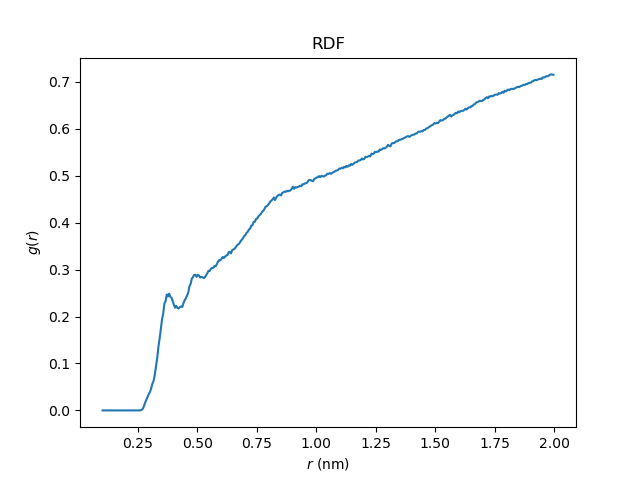

In [12]:
# trying to show image from the correct path
correct_rdf_path = agent.path_registry.ckpt_figures + "/rdf_" + "rec0_161529" + ".png"
assert os.path.exists(correct_rdf_path)

from IPython.display import Image
Image(filename=correct_rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Completed without Hallucination ✅
### Logic make sense ✅
### Correct Answer  ✅